In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

path = r"C:\Users\alepa\Desktop\Data Science\[1] 2nd Semester\Mathematical Models and Numerical Methods for Big Data\Code\Movie_Rating.csv"
ratings_df = pd.read_csv(path)

In [3]:

# some data cleaning after looking at the spreadsheet
# drop label columns, replace -1 with NaN since we will center data
# and -1s would be affected and lose their purpose
ratings_only_df = ratings_df.drop(['Risposta', 'Nome'], axis=1).replace(-1, np.nan)

In [4]:

# center the data by subtracting the mean rating for each movie
centered_ratings_df = ratings_only_df.subtract(ratings_only_df.mean(), axis=1)

In [5]:

# plug -1s back after centering
centered_ratings_df.fillna(-1, inplace=True)

In [6]:

# define num_features as 2 as we need a 2D graph
num_features = 2
A = centered_ratings_df

In [7]:

# Funk SVD algorithm
def funk_svd_qr(A, num_features, steps=5000, learning_rate=0.0002, beta=0.02):
    num_rows, num_cols = A.shape
    Q = np.random.rand(num_rows, num_features)
    R = np.random.rand(num_features, num_cols)
    for step in range(steps):
        for i in range(num_rows):
            for j in range(num_cols):
                if A.iloc[i, j] != -1:  # this is so that our re-plugged -1 values don't get in the way
                    pred_ij = np.dot(Q[i, :], R[:, j])
                    e_ij = A.iloc[i, j] - pred_ij
                    Q[i, :] += learning_rate * (2 * e_ij * R[:, j] - beta * Q[i, :])
                    R[:, j] += learning_rate * (2 * e_ij * Q[i, :] - beta * R[:, j])
    return Q, R

In [8]:

# execute the function
Q, R = funk_svd_qr(A, num_features)

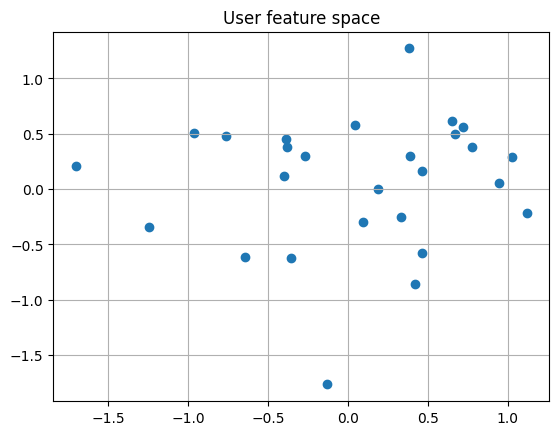

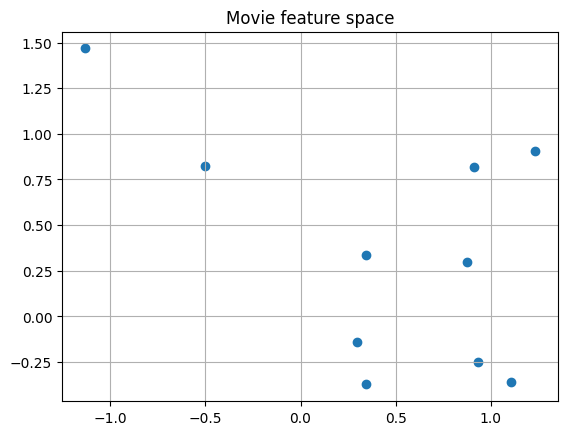

In [9]:

# plotting
plt.scatter(Q[:, 0], Q[:, 1])
plt.title('User feature space')
plt.grid(True)
plt.show()

plt.scatter(R[0, :], R[1, :])
plt.title('Movie feature space')
plt.grid(True)
plt.show()
